# ANLY-590 Assignment 1
## Xinyao Mo

## Q1：

Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables. 

### Q 1.1

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('Hitters.csv')
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [2]:
data=data.dropna()
data.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [3]:
#Lasso
Y=data['Salary'].values
X = data.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague', 'Salary'],axis=1)


from sklearn.linear_model import  Lasso
n_alphas = 200
alphas = np.logspace(3, -3, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, normalize = True, max_iter=10000)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)

In [5]:
#coefs

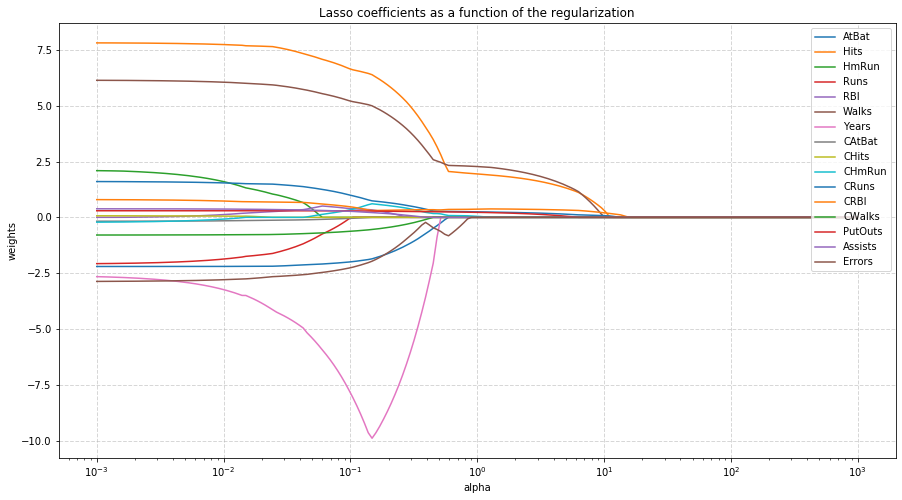

In [9]:
#Vis
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(X.columns,loc=1)
plt.axis('tight')
plt.show()

From the above graph, we can see that when alpha is aroud 10, there only three preditors left: 'Hits', 'CRuns' and 'CRBI'

In [12]:
#cross-validation
from sklearn.linear_model import  LassoCV
lasso_cv = LassoCV(cv=10, random_state=222, normalize = True, max_iter=10000).fit(X, Y)

The optimal value of the regularization penality is:

In [13]:
lasso_cv.alpha_

0.0635481759985745

We can see that there are 14 coeficients that are not equal to zero, thus The number of predictors are left in that model is 14

### Q 1.2

In [18]:
#Ridge
from sklearn.linear_model import Ridge
n_alphas = 200
alphas = np.logspace(3, -3, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, normalize = True, max_iter=10000)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

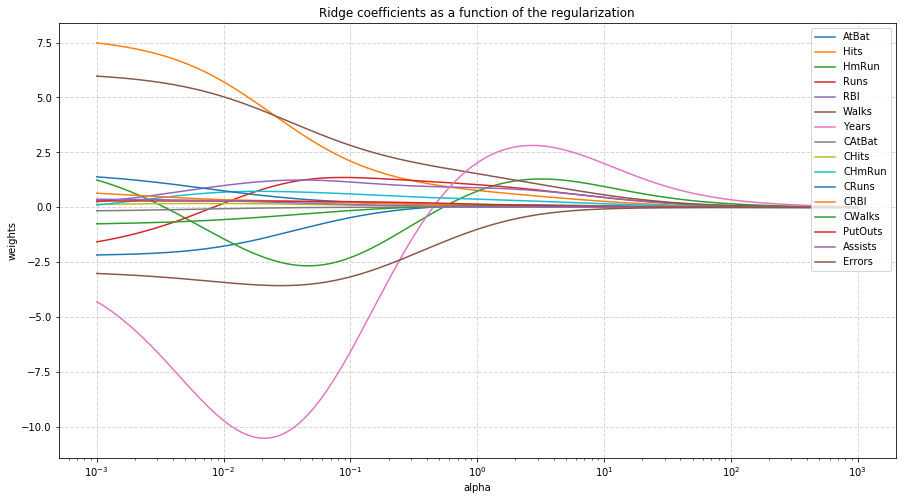

In [19]:
#Vis
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(X.columns,loc=1)
plt.axis('tight')
plt.show()

In [20]:
#cross-validation
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=10, normalize = True).fit(X, Y)

C:\Users\Cosmo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The optimal value of the regularization penality is:

In [21]:
ridge_cv.alpha_

1.0

## Q2

**Short Answer**. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

For bias-variance tradeoff,it means that models cannot have both low bias and low variance. 

To achieve a good balance between bias and variance, we need to reduce the variance a little bit for a low-bias model and that is the role regularization plays in the tradeoff. Via regularization, we can shrink or eliminate the influence of some predictors, so the model can have a not-high bias and a not-high variance.

For both visualizations in Q1, we  can see that as alpha increases, the coef of preditors goes smaller or evan become zero. It means that the influence of these preditors to the models become smaller or even can be moved out of the model, which results in a lower variance and higher bias model.